# Beer Mart Assignment - Recommendation System

#####  Problem Statement : You are the sales manager for "BeerMart", an online beer store in the United States. You want to build a recommendation system (collaborative) for your store, where customers will be recommended the beer that they are most likely to buy. You collect data about the ratings that the customers have given in the past.

In [2]:
# Import libraties
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Beer_Mart file
Beer_Mart = pd.read_csv('E:\\Upgrad\\Beer Mart\\beer_data.csv', encoding = 'latin-1')

In [3]:
#Top 5 records
Beer_Mart.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [4]:
#Shape of Dataset
Beer_Mart.shape

(475984, 3)

In [5]:
#Checking Info
Beer_Mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [6]:
#Checking for the null values coulmnwise
Beer_Mart.isnull().sum(axis=0)

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

#### Found 100 Null Values in the Profilename Column

In [7]:
#Dropping Null Values in the dataframe
Beer_Mart = Beer_Mart.dropna()

In [8]:
Beer_Mart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475884 non-null int64
review_profilename    475884 non-null object
review_overall        475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [9]:
#Check for Duplicates
Beer_Mart.duplicated(['beer_beerid', 'review_profilename']).sum()

1422

In [10]:
#Dropping the Duplicates 
Beer_Mart = Beer_Mart.drop_duplicates(['beer_beerid', 'review_profilename'], keep = 'first')

In [11]:
Beer_Mart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           474462 non-null int64
review_profilename    474462 non-null object
review_overall        474462 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


#### Now the Dataset contains 474462 rows unique rows and with Non Null Values

In [12]:
#Unique BeerId's 
len(Beer_Mart.beer_beerid.unique())

40304

In [13]:
#Unique review_profilename
len(Beer_Mart.review_profilename.unique())

22497

In [14]:
#Unique Reviews 
len(Beer_Mart.review_overall.unique())

10

#### DataSet has 40304 Unique BeerId's with 22497 Profilenames has given 10 unique ratings

In [15]:
#Check for the Occurence of Rating related counts 
Value = Beer_Mart.review_overall.astype('category').value_counts()

In [16]:
Beer_Mart.review_overall.astype('category').value_counts()

4.0    174240
4.5     96937
3.5     90578
3.0     49426
5.0     27037
2.5     17557
2.0     11587
1.5      3810
1.0      3284
0.0         6
Name: review_overall, dtype: int64

Text(0.5, 0, 'review_overall')

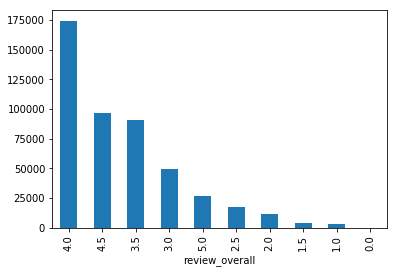

In [17]:
Value.plot.bar()
plt.xlabel('review_overall')

## Data Preparation

#### Choose only those beers that have at least N number of reviews.
1. Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [18]:
#Count of Review_counts for BeerId's
Count_Beer_Mart = Beer_Mart.groupby('beer_beerid').count()[['review_profilename']].sort_values('review_profilename', ascending = False).reset_index()
Count_Beer_Mart.columns = ['beer_id','no_of_ratings']

In [19]:
Count_Beer_Mart.head()

,beer_id,no_of_ratings
0,2093,977
1,412,966
2,1904,902
3,1093,840
4,92,812


In [20]:
Count_Beer_Mart.shape

(40304, 2)

There are 40304 Unique Beer Id's having reviews, With 2093 Beer Id having Maximum Reviews of count 987 ---> Nearly 8% of total

In [21]:
#Checking the ratings corresponding to each beer id at various percentiles
Count_Beer_Mart.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.93,.95,.97,.99])

,beer_id,no_of_ratings
count,40304.000000,40304.000000
mean,36973.166460,11.772082
std,22544.756432,41.888449
min,3.000000,1.000000
10%,5754.600000,1.000000
20%,12902.600000,1.000000
30%,20923.900000,1.000000
40%,28986.600000,1.000000
50%,37366.500000,2.000000
60%,44895.800000,2.000000


In [ ]:
#Count_Beer_Mart.plot.bar()
#plt.xlabel('No. of Reviews')

Looks Like there are some Beer Id's with rating review 1, we will take a count

In [22]:
#Count of Beer Id's having Rating as 1
BeerId_Rating_1 = pd.DataFrame(Count_Beer_Mart[Count_Beer_Mart == 1]).sum()
BeerId_Rating_1

beer_id              0.0
no_of_ratings    18080.0
dtype: float64

In [23]:
#Count of Beer Id's having Rating greater than or eqal to 51
BeerId_Rating = Count_Beer_Mart.loc[Count_Beer_Mart.no_of_ratings >= 51]

In [24]:
BeerId_Rating.shape

(2028, 2)

In [25]:
#series conversion of Beer Id's to list so as to use to filter
List_BeerId_Rating = list(BeerId_Rating.beer_id)

In [26]:
#Preparing the final dataframe by filtering only the required beer ids
Beer_Mart_New = Beer_Mart.loc[Beer_Mart.beer_beerid.isin(List_BeerId_Rating)]

In [27]:
Beer_Mart_New.shape

(294197, 3)

In [28]:
Beer_Mart_New.head()

,beer_beerid,review_profilename,review_overall
12,436,Brent,3.0
101,10784,CHILLINDYLAN,4.5
102,10784,JayQue,4.0
103,10784,AlCaponeJunior,4.0
104,10784,BEERchitect,4.0


### Data Exploration

1.What are the unique values of ratings?

In [29]:
# Count of unique values for the ratings 
pd.DataFrame(Beer_Mart_New.review_overall.astype('category').value_counts())

,review_overall
4.0,110316
4.5,66724
3.5,51606
3.0,26895
5.0,20076
2.5,9038
2.0,5987
1.5,1873
1.0,1682


2. Visualise the rating values and notice:
    1. The average beer ratings

In [30]:
#average rating for each beerID
BeerID_Avg = Beer_Mart_New.groupby('beer_beerid').mean().sort_values('review_overall',ascending = False).reset_index()
BeerID_Avg.head()

,beer_beerid,review_overall
0,16814,4.650735
1,1545,4.622276
2,21690,4.608108
3,7971,4.596401
4,47658,4.586592


In [31]:
BeerID_Avg.shape

(2028, 2)

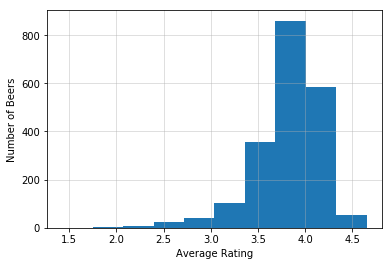

In [32]:
plt.hist(BeerID_Avg['review_overall'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

B. The average user ratings

In [33]:
avg_user_ratings = Beer_Mart_New.groupby('review_profilename')['review_overall'].agg(['mean']).reset_index()
avg_user_ratings.head()

,review_profilename,mean
0,0110x011,4.333333
1,01Ryan10,5.000000
2,04101Brewer,4.000000
3,05Harley,4.116667
4,0beerguy0,4.166667


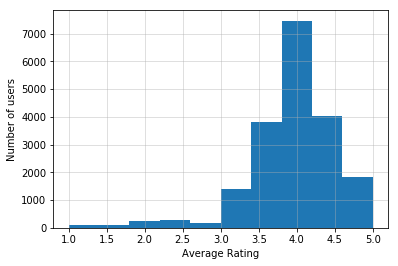

In [34]:
plt.hist(avg_user_ratings['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of users')
plt.show()

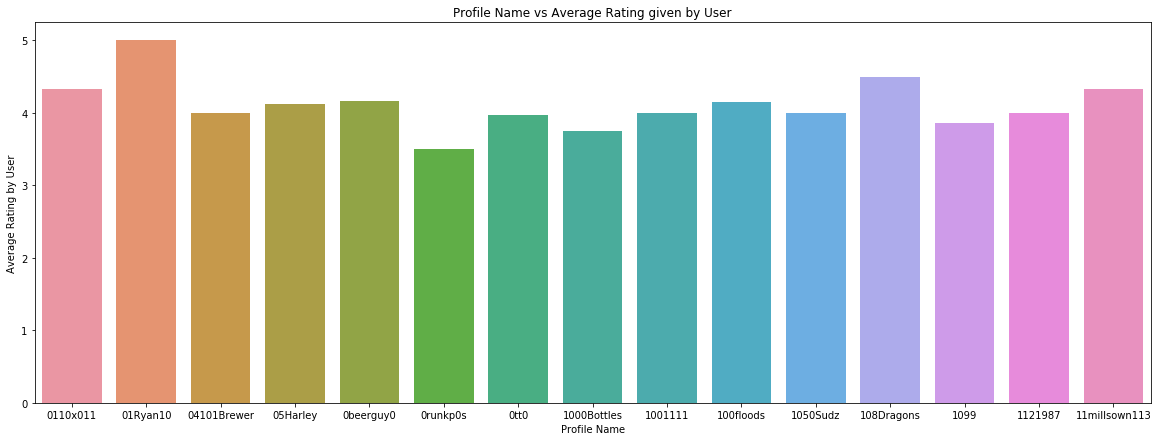

In [35]:
# Plot for average user ratings of 15 random users
plt.figure(figsize = (20,7))
plt.title("Profile Name vs Average Rating given by User")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = Beer_Mart_New.groupby('review_profilename').mean().reset_index().head(15))
plt.xlabel("Profile Name") 
plt.ylabel("Average Rating by User")
plt.show()

C. The average number of ratings given to the beers

In [36]:
avg_beer_reviews = Beer_Mart_New.groupby('beer_beerid')['review_overall'].agg(['mean']).reset_index()
avg_beer_reviews.head()

,beer_beerid,mean
0,5,3.553097
1,6,3.711462
2,7,3.317073
3,10,3.883028
4,14,3.830508


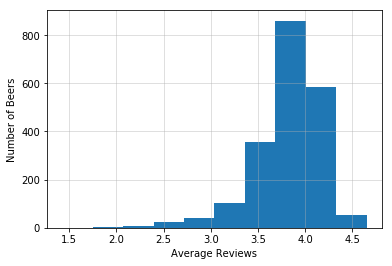

In [37]:
#Plot for avg_beer_reviews
plt.hist(avg_beer_reviews['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Reviews')
plt.ylabel('Number of Beers')
plt.show()

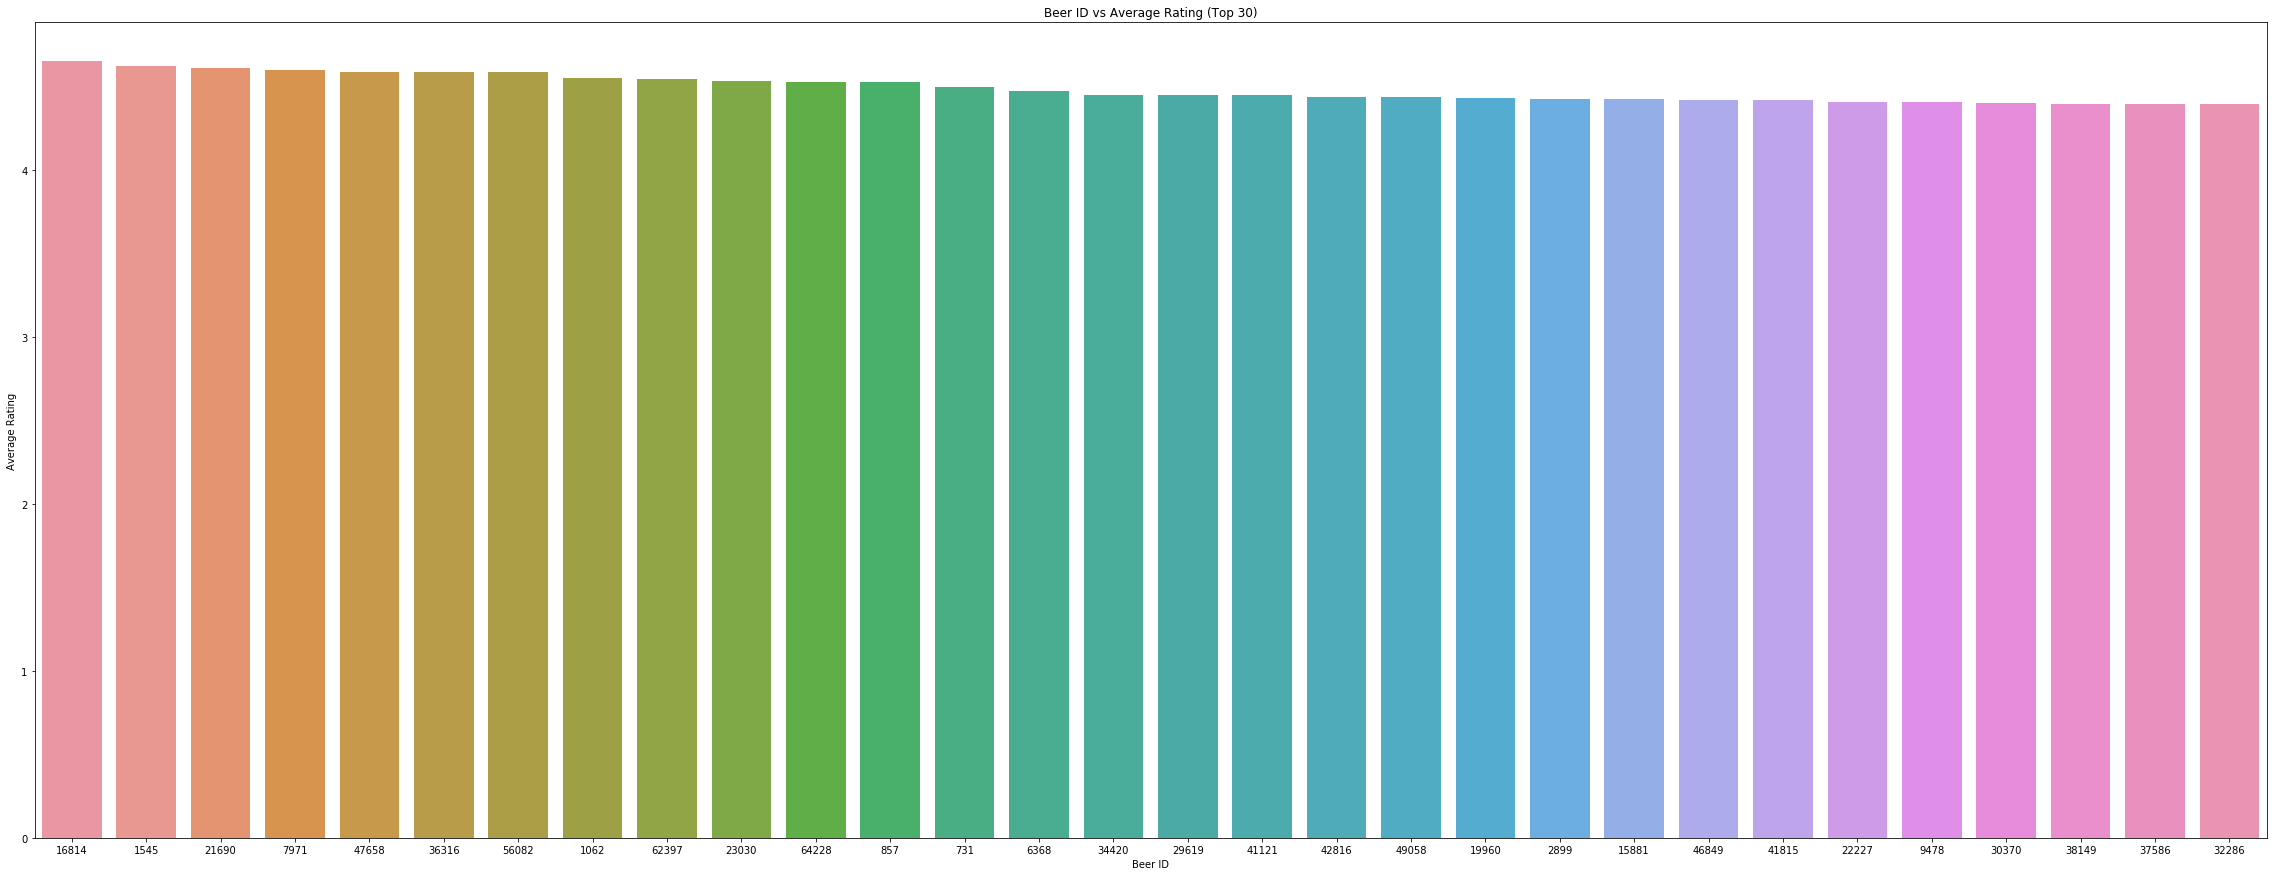

In [38]:
# Plot for average beer ratings of top 30 rated beers
plt.figure(figsize = (40,15))
plt.title('Beer ID vs Average Rating (Top 30)')
ax = sns.barplot(x = 'beer_beerid', y = 'review_overall', data = BeerID_Avg.head(30), order = BeerID_Avg['beer_beerid'].head(30))
sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Beer ID", ylabel = "Average Rating")
plt.show()

In [39]:
#'The average number of ratings given to the beers'
Beer_Mart_New.groupby('beer_beerid').count().mean()

review_profilename    145.067554
review_overall        145.067554
dtype: float64

D. The average number of ratings given by the users

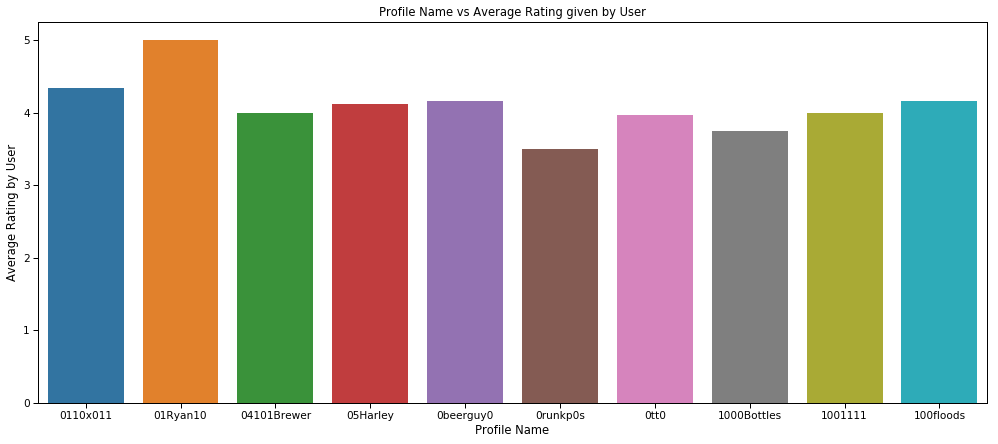

In [40]:
# Plot for the average user ratings given by users 
plt.figure(figsize = (17,7))
plt.title("Profile Name vs Average Rating given by User")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = Beer_Mart_New.groupby('review_profilename').mean().reset_index().head(10))
plt.xlabel("Profile Name") 
plt.ylabel("Average Rating by User")
plt.show()

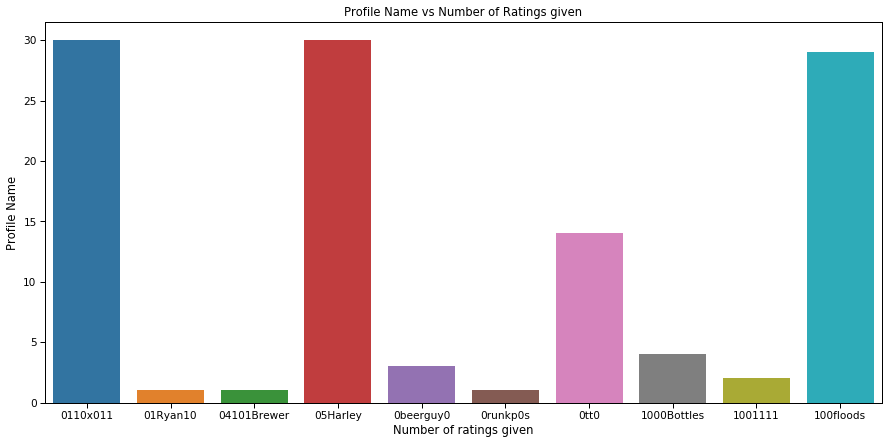

In [41]:
# Plotting the number of ratings given by user of random 10 users
plt.figure(figsize = (15,7))
plt.title("Profile Name vs Number of Ratings given")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = Beer_Mart_New.groupby('review_profilename').count().reset_index().head(10))
plt.xlabel("Number of ratings given")
plt.ylabel("Profile Name")
plt.show()

In [42]:
#'The average number of ratings given by the users'
Beer_Mart_New.groupby('review_profilename').count().mean()

beer_beerid       15.128143
review_overall    15.128143
dtype: float64

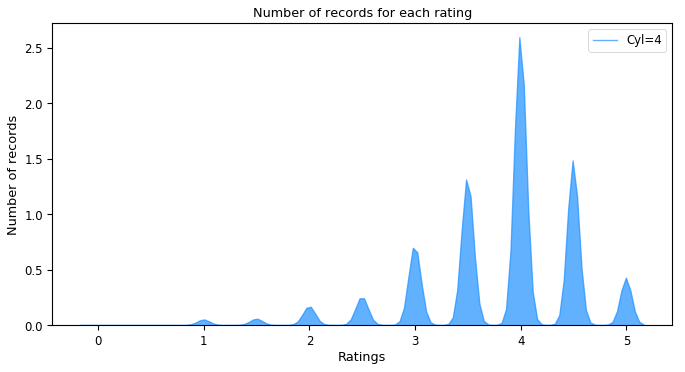

In [43]:
#plot for showing the Number of records for each rating
plt.figure(figsize=(10,5), dpi= 80)
plt.title("Number of records for each rating")
sns.kdeplot(Beer_Mart['review_overall'], shade=True, color="dodgerblue", label="Cyl=4", alpha=.7)
plt.xlabel('Ratings')
plt.ylabel('Number of records')
plt.show()

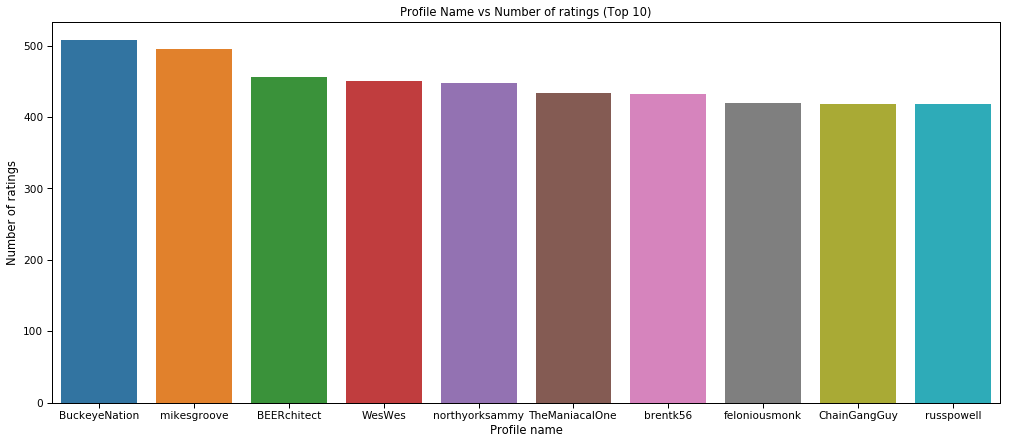

In [44]:
# Plotting the number of ratings of top 10 users(Based on number of ratings provided)
plt.figure(figsize = (17,7))
plt.title("Profile Name vs Number of ratings (Top 10)")
sns.barplot(x = 'review_profilename', y = 'review_overall', data = Beer_Mart_New.groupby('review_profilename').count().sort_values('review_overall',ascending = False).reset_index().head(10))
plt.xlabel("Profile name")
plt.ylabel("Number of ratings")
plt.show()

#### BuckeyNation has given the highest number of records

### 3. Recommendation Models

1. Divide your data into training and testing dataset.

In [45]:
#Importing library for test train split 
from sklearn.model_selection import train_test_split

In [46]:
#Data Splitting into test & train with 30% in test & 70% in train
train, test = train_test_split(Beer_Mart_New, test_size=0.30, random_state=31)

In [47]:
#Checking the info using shapes of the test & train datasets
print(train.shape)
print(test.shape)

(205937, 3)
(88260, 3)


In [48]:
# pivot ratings into beer features
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [49]:
beer_features.head(10)

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0runkp0s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [50]:
#Copy of the datasets
dummy_train = train.copy()
dummy_test = test.copy()

In [51]:
#On the Basis of abovr logic, Converting the ratings to 1/0 
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [52]:
# For dummy_train, the beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# For dummy_test, the beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [53]:
#Displaying Dummy_Train data
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [54]:
#Displaying Dummy_Test data
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User Similarity Matrix

## Using Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

In [ ]:
#Checking user_correlation shape
user_correlation.shape

## Using adjusted Cosine 

### Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [ ]:
ADC_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
#checking ADC_beer_features dataframe
ADC_beer_features.head()

### Normalising the rating of the movie for each user aroung 0 mean

In [ ]:
mean = np.nanmean(ADC_beer_features, axis=1)
df_subtracted = (ADC_beer_features.T-mean).T

In [ ]:
df_subtracted.head()

### Finding cosine similarity

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

## Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

Rating predicted by the user (for beers rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset).

In [ ]:
user_predicted_ratings = np.dot(user_correlation, ADC_beer_features.fillna(0))
user_predicted_ratings

In [ ]:
user_predicted_ratings.shape

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero.

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

### Finding the top 5 recommendation for the user 3

In [ ]:
user_final_rating.iloc[3].sort_values(ascending=False)[0:5]

# Item Based Similarity

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different beer ID. In the user based similarity, we had taken mean for each user intead of each beer.

In [ ]:
ADC_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

ADC_beer_features.head()

Normalising the beer rating for each beer

In [ ]:
mean = np.nanmean(ADC_beer_features, axis=1)
df_subtracted = (ADC_beer_features.T-mean).T

In [ ]:
df_subtracted.head()

Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

# Prediction

In [ ]:
Item_predicted_ratings = np.dot((ADC_beer_features.fillna(0).T),item_correlation)
Item_predicted_ratings

In [ ]:
Item_predicted_ratings.shape

In [ ]:
dummy_train.shape

### Filtering the rating only for the beers not rated by the user for recommendation

In [ ]:
Item_final_ratings = np.multiply(Item_predicted_ratings,dummy_train)
Item_final_ratings.head()

### Top 5 prediction for the user - 3

In [ ]:
Item_final_ratings.iloc[3].sort_values(ascending=False)[0:5]

### Compute and visualise the similarity between the first 10 beers.

In [ ]:
# Plot for Heatmap to first 10 items
plt.figure(figsize=(8,8))
sns.heatmap(item_correlation[0:10,0:10], annot = True,linewidths=.0)

In [ ]:
# Plot for Heatmap to first 10 users
plt.figure(figsize=(8,8))
sns.heatmap(user_correlation[0:10,0:10], annot = True,linewidths=.0)

#### Below are the names of  top 5 beers that we would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [ ]:
#Based on item based model, Below are the Top 5 beers recommended to 'cokes' 
Item_final_ratings.loc["cokes"].sort_values(ascending=False)[0:5]

In [ ]:
#Based on User based model, Below are the Top 5 beers recommended to 'cokes'
user_final_rating.loc["cokes"].sort_values(ascending=False)[0:5]

In [ ]:
#Based on item based model, Below are the Top 5 beers recommended to 'genog' 
Item_final_ratings.loc["genog"].sort_values(ascending=False)[0:5]

In [ ]:
#Based on User based model, Below are the Top 5 beers recommended to 'genog' 
user_final_rating.loc["genog"].sort_values(ascending=False)[0:5]

In [ ]:
#Based on item based model, Below are the Top 5 beers recommended to 'giblet' 
Item_final_ratings.loc["giblet"].sort_values(ascending=False)[0:5]

In [ ]:
#Based on User based model, Below are the Top 5 beers recommended to 'giblet' 
user_final_rating.loc["giblet"].sort_values(ascending=False)[0:5]

## Evaluation

Evaluation will be same as we have seen above for the prediction. The only difference being, we will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user.

In [ ]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

In [ ]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

#### Prediction for the Beers rated by the user

In [ ]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [ ]:
test_user_final_rating.head()

### Calculating the RMSE for the beers rated by user. For RMSE, no need for normalising the rating to (1,5) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

print(X)

In [ ]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(X))

In [ ]:
rmse = (sum(sum((test_ - X )**2))/total_non_nan)**0.5
print(rmse)

### Using Item similarity

In [ ]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [ ]:
test_item_correlation.shape

In [ ]:
test_beer_features.shape

In [ ]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

In [ ]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]
y = X
# scaler = MinMaxScaler(feature_range=(1, 5))
# print(scaler.fit(X))
# y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

From the Above, the rmse value for Item based prediction is far less than the User based predictions. Therefore, we can choose Item based prediction model as the best model and can choose it for deployment.